# **California Housing Price Prediction Project**

### **Project by HARSH MISHRA**
### **Final Project Submission**
### **Summer Training: MACHINE LEARNING AND AI**
### **Organization: Board Infinity**

****

## **1. Importing Libraries**
In this section, we will import the necessary libraries for data manipulation, visualization, and building our machine learning model.

In [50]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing


## **2. Loading the Dataset**
We will load the California Housing dataset and create a DataFrame to organize the data. The target variable, which is the house price, will be added as a new column.

In [51]:
# Load the California Housing dataset

california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

## **3. Randomly Selecting Samples**
To keep the analysis manageable, we will randomly select 700 samples from the dataset for our study.

In [52]:
# Randomly Selecting 300 Samples

df_sample = df.sample(n=700, random_state=42)

## **4. Looking at our data**
This section will provide an overview of the dataset, displaying the first five rows to understand the features and structure of our data.

In [53]:
# Overview of the data

print("First five rows of the dataset:")
print(df_sample.head())

First five rows of the dataset:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   
3024   2.5313      30.0  5.039384   1.193493      1565.0  2.679795     35.14   
15663  3.4801      52.0  3.977155   1.185877      1310.0  1.360332     37.80   
20484  5.7376      17.0  6.163636   1.020202      1705.0  3.444444     34.28   
9814   3.7250      34.0  5.492991   1.028037      1063.0  2.483645     36.62   

       Longitude    PRICE  
20046    -119.01  0.47700  
3024     -119.46  0.45800  
15663    -122.44  5.00001  
20484    -118.72  2.18600  
9814     -121.93  2.78000  


In [54]:
# Display DataFrame information
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 20046 to 5350
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      700 non-null    float64
 1   HouseAge    700 non-null    float64
 2   AveRooms    700 non-null    float64
 3   AveBedrms   700 non-null    float64
 4   Population  700 non-null    float64
 5   AveOccup    700 non-null    float64
 6   Latitude    700 non-null    float64
 7   Longitude   700 non-null    float64
 8   PRICE       700 non-null    float64
dtypes: float64(9)
memory usage: 54.7 KB
None


In [55]:
# Display summary statistics
print(df_sample.describe())

           MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  700.000000  700.000000  700.000000  700.000000   700.000000   
mean     3.937653   28.855714    5.404192    1.079266  1387.422857   
std      2.085831   12.353313    1.848898    0.236318  1027.873659   
min      0.852700    2.000000    2.096692    0.500000     8.000000   
25%      2.576350   18.000000    4.397751    1.005934   781.000000   
50%      3.480000   30.000000    5.145295    1.047086  1159.500000   
75%      4.794625   37.000000    6.098061    1.098656  1666.500000   
max     15.000100   52.000000   36.075472    5.273585  8652.000000   

         AveOccup    Latitude   Longitude       PRICE  
count  700.000000  700.000000  700.000000  700.000000  
mean     2.939913   35.498243 -119.439729    2.082073  
std      0.745525    2.123689    1.956998    1.157855  
min      1.312994   32.590000 -124.150000    0.458000  
25%      2.457560   33.930000 -121.497500    1.218500  
50%      2.834524   34.190000 -11

## **5. Splitting the Dataset into Train and Test Sets**
We will separate the dataset into features (X) and the target variable (y) and then split it into training and testing sets for model training and evaluation.

In [56]:
# Splitting the dataset into Train and Test sets

X = df_sample.drop('PRICE', axis=1)  # Features
y = df_sample['PRICE']  # Target variable

Split the dataset into training and testing sets.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **6. Model Training**
In this section, we will create and train a Linear Regression model using the training data to learn the relationship between features and house prices.

In [58]:
# Creating and training the Linear Regression model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## **7. Evaluating the Model**
We will make predictions on the test set and calculate the Mean Squared Error (MSE) and R-squared values to evaluate the model's performance.

In [59]:
# Making predictions on the test set

y_pred = lr.predict(X_test)

Calculate Mean Squared Error (MSE)

In [60]:
# Calculating Mean Squared Error

mse = mean_squared_error(y_test, y_pred)
print(f"\nLinear Regression Mean Squared Error: {mse}")


Linear Regression Mean Squared Error: 0.3699851092128846


## **8. Displaying Actual vs Predicted Values**
Here, we will create a DataFrame to compare the actual house prices with the predicted prices generated by our model.

In [61]:
# Displaying Actual vs Predicted Values

results = pd.DataFrame({'Actual Prices': y_test.values, 'Predicted Prices': y_pred})
print("\nActual vs Predicted:")
print(results)


Actual vs Predicted:
     Actual Prices  Predicted Prices
0          0.87500          0.887202
1          1.19400          2.445412
2          5.00001          6.249122
3          2.78700          2.743305
4          1.99300          2.794774
..             ...               ...
135        1.62100          2.246041
136        3.52500          2.626354
137        1.91700          1.899090
138        2.27900          2.731436
139        1.73400          2.017134

[140 rows x 2 columns]


## **9. Visualizing the Results**
In the final section, we will visualize the relationship between actual and predicted house prices using a scatter plot to assess the model's performance visually.

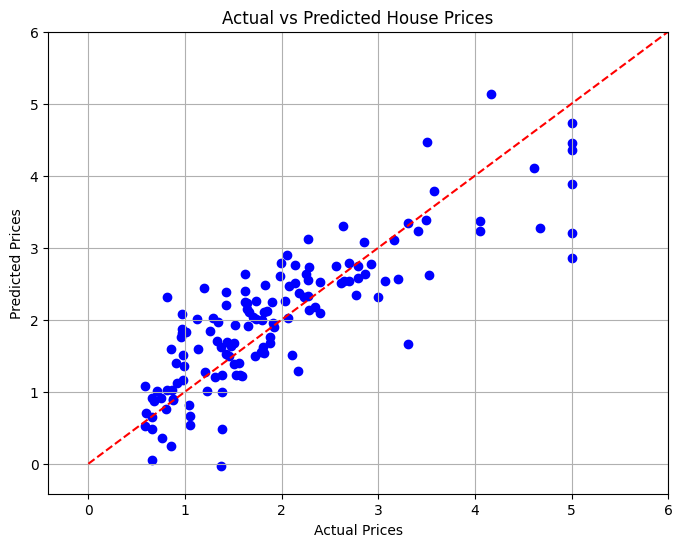

In [62]:
# Visualizing the Results

#-----------------------------------------------------
# Note: Please do not alter this portion of the code.
#-----------------------------------------------------

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')

# Draw the ideal line
plt.plot([0, 6], [0, 6], color='red', linestyle='--')

# Set limits to minimize empty space
plt.xlim(y_test.min() - 1, y_test.max() + 1)
plt.ylim(y_test.min() - 1, y_test.max() + 1)

plt.grid()
plt.show()